# Credit Risk Analysis and Prediction Modelling of Home Equity Loans using Data Mining

The primary aim of this study is to analyse credit banking risk and prediction modelling of home equity loans. The objectives of the thesis are as follows:

1.	To explore Basel I, Basel II, Basel III regulations, and IFRS 9 regarding credit risk.
2.	To conduct research as to why Random Forest algorithm, ..... is used in this study as data mining classification technique in credit scoring.
3.	To conduct research using Jupyter Notebook by applying python libraries for the analysis and model building following the CRISP-DM methodology. 
4.	To analyse the patterns and the factors that might considerably lead to the risk of a customer defaulting on home equity loans
5.	To validate the Random Forest classification model that can efficiently classify customers into good (non-default) and bad (default).



In [1]:
#load librairies
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
#read data
df = pd.read_csv('/Users/asumankabugo/Desktop/hmeq.csv')


# Data Understanding
1. Discriptive statistics
2. Data types

In [3]:
# print shape of dataset with rows and columns
print(df.shape)

(5960, 13)


In [4]:
# print the top 5 records of dataset
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
#object columns
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [6]:
# view data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
#Identify numeric variables(descriptive statistics)
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


# Data Preparation (Data Analysis)
1. Missing values
2. All the numerical variables
3. Distribution of Numerical variables
4. Categorical variables
5. Outliers
6. Relationship between independent and dependent feature(BAD)


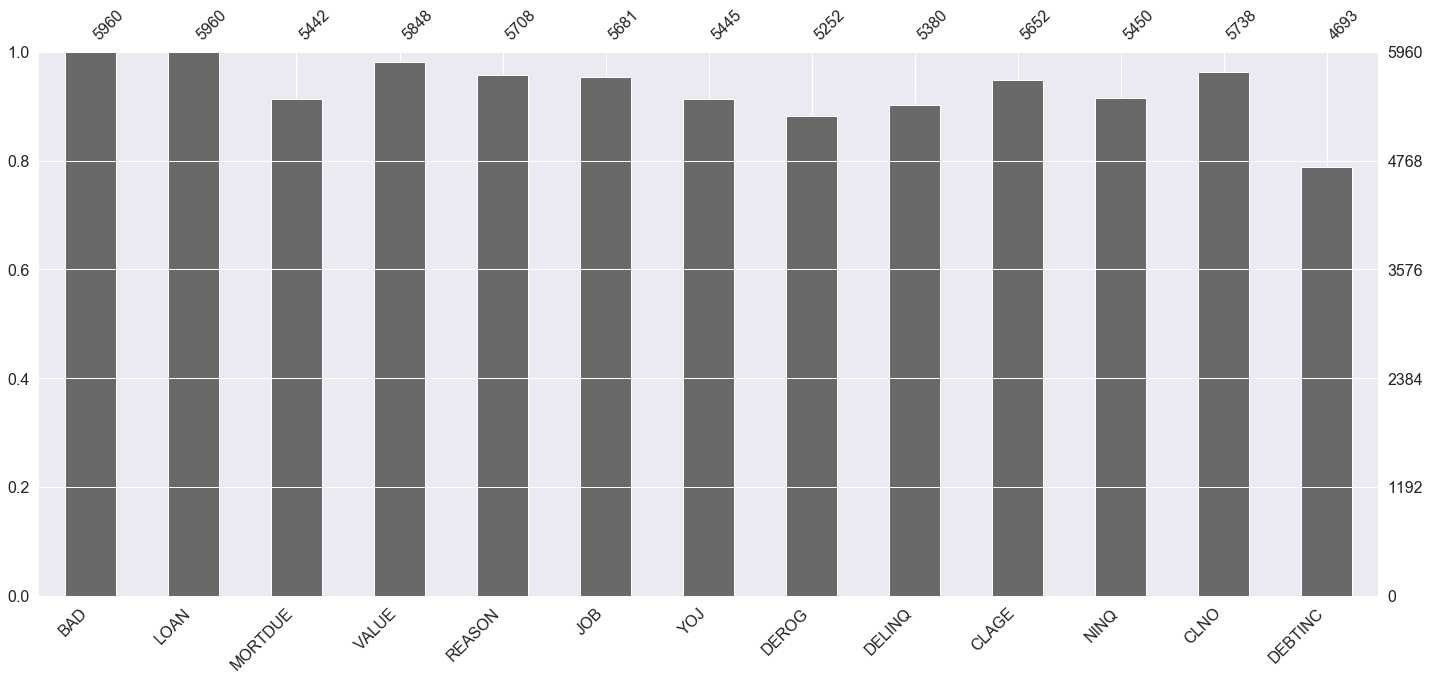

In [8]:
# Visualize the number of missing values as a bar chart
import missingno as msno
msno.bar(df)

# Handling Missing Values

In [9]:
# Remove rows missing data
df = df.dropna()

In [10]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

# Analysis of categorical variables with target variable bad
Let's plot some diagram for this relationship

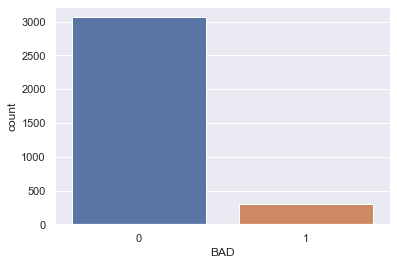

In [11]:
# visual frequency distribution of target variable, BAD
sns.countplot(df.BAD) 
plt.show()


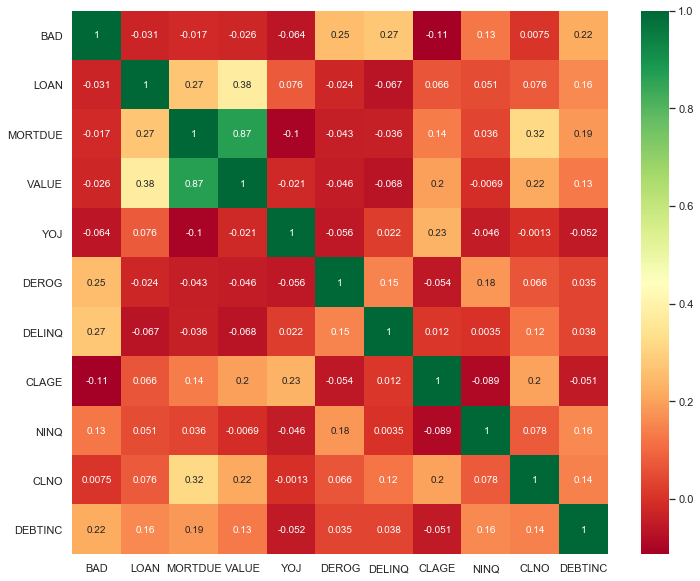

In [12]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
#identify categroical faetures
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['REASON', 'JOB']

In [14]:
#Percentage of BAD in each JOB category
pd.crosstab(df.JOB, df.BAD, normalize='index')

BAD,0,1
JOB,,
Mgr,0.900000,0.100000
Office,0.934142,0.065858
Other,0.897356,0.102644
ProfExe,0.935484,0.064516
Sales,0.735849,0.264151
Self,0.868687,0.131313


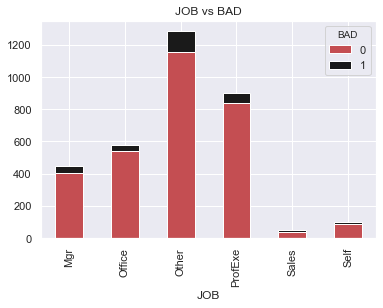

In [15]:
#relationship between JOB and target variable BAD
colors_list = ['r','k']
pd.crosstab(df['JOB'], df['BAD']).plot(kind='bar',color = colors_list, title='JOB vs BAD', stacked=True)
plt.show()

In [16]:
#Percentage of BAD in categories of REASON
pd.crosstab(df.REASON, df.BAD, normalize='index')

BAD,0,1
REASON,,
DebtCon,0.909667,0.090333
HomeImp,0.913568,0.086432


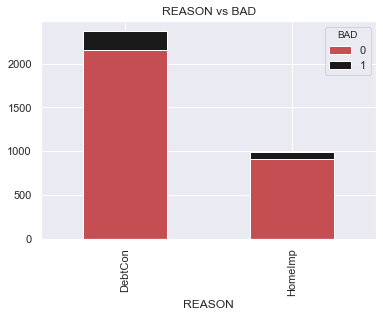

In [17]:
#relationship between REASON and target variable BAD
colors_list = ['r','k']
pd.crosstab(df['REASON'], df['BAD']).plot(kind='bar',color = colors_list, title='REASON vs BAD', stacked=True)
plt.show()

# Distribution of numerical features

In [18]:
#identify numerical features
numerical_features = ['LOAN','MORTDUE','VALUE','DEROG','DELINQ','NINQ','CLAGE','CLNO','DEBTINC','YOJ']
print("numerical features Count {}".format(len(numerical_features)))

numerical features Count 10


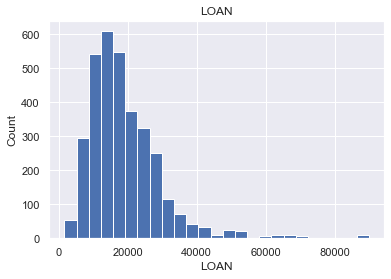

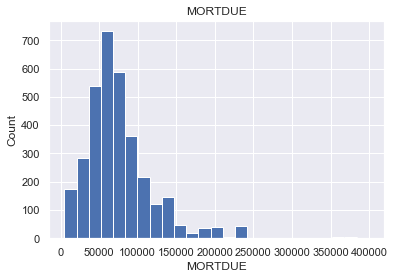

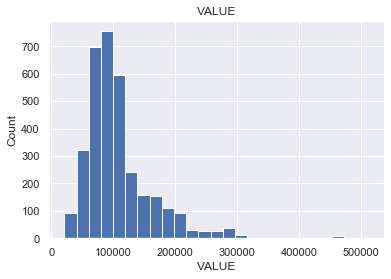

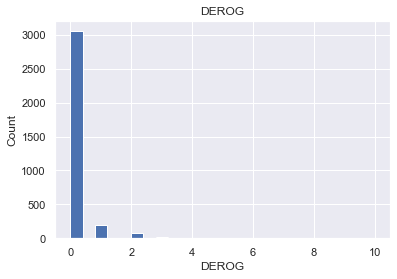

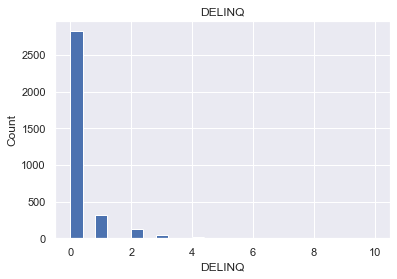

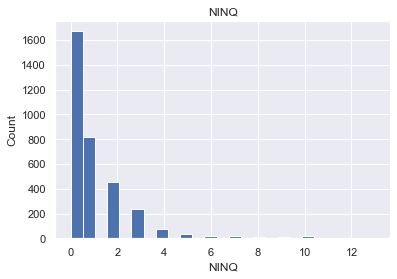

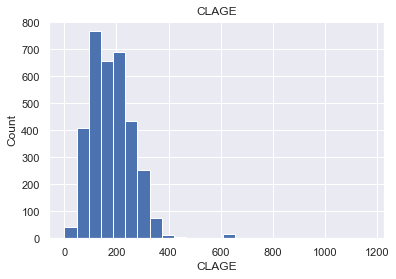

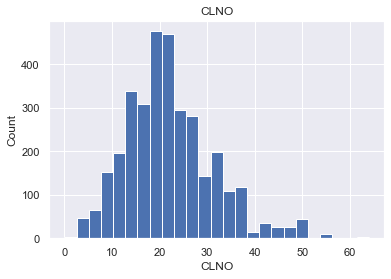

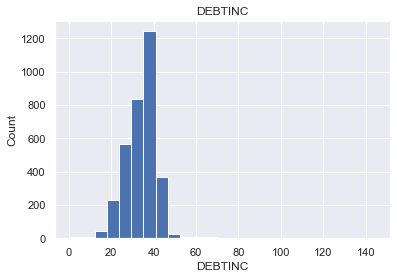

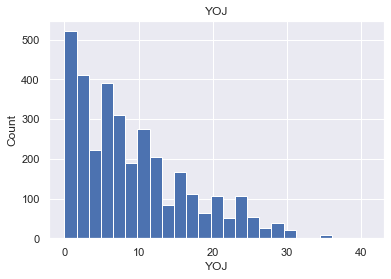

In [19]:
# Lets analyse the continuous variables by creating histograms to understand the distribution

for feature in numerical_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

All the outputs above indicate that the dat is skewed. The distribution is not normal. Therefore, to normalise the distribution, we will use log transformation. 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


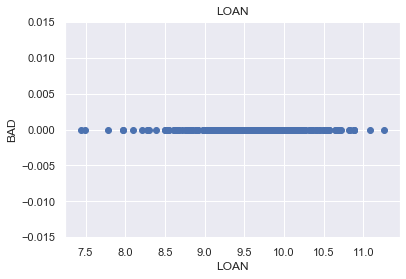

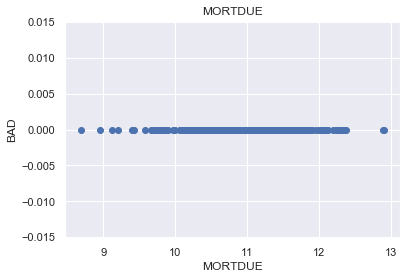

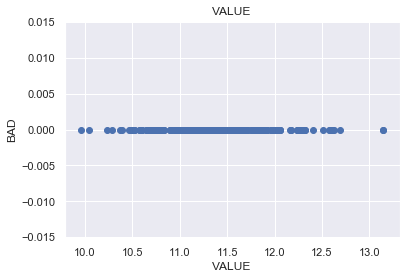

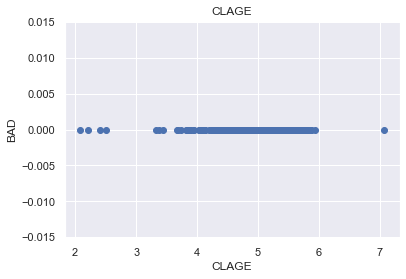

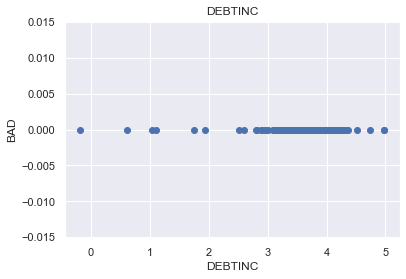

In [20]:
# We will be using logarithmic transformation
for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['BAD']=np.log(data['BAD'])
        plt.scatter(data[feature],data['BAD'])
        plt.xlabel(feature)
        plt.ylabel('BAD')
        plt.title(feature)
        plt.show()

The outputs above indicate there is a positive relationship between the numerical features and BAD

In [21]:
#comparing means of BAD and DELINQ
df.groupby('BAD')['DELINQ'].agg(['count','mean'])

,count,mean
BAD,,
0,3064,0.209204
1,300,0.990000


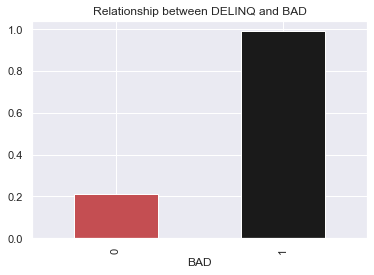

In [22]:
#relationship between DELINQ and BAD
colors_list = ['r','k']
default_by_DELINQ = df.groupby('BAD')['DELINQ'].mean()
default_by_DELINQ.plot(kind='bar', color = colors_list,edgecolor=None,title='Relationship between DELINQ and BAD', sharey=True)
plt.show()

In [23]:
#comparing means of DEROG and BAD
df.groupby('BAD')['DEROG'].agg(['count','mean'])

,count,mean
BAD,,
0,3064,0.100849
1,300,0.616667


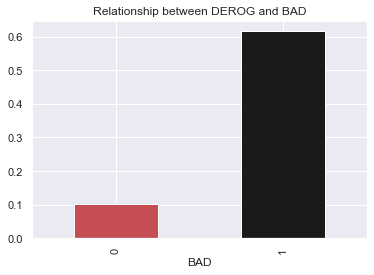

In [24]:
#relationship between DEROG and BAD
colors_list = ['r','k']
default_by_DEROG = df.groupby('BAD')['DEROG'].mean()
default_by_DEROG.plot(kind='bar', color=colors_list,edgecolor=None,title='Relationship between DEROG and BAD', sharey=True)
plt.show()

In [25]:
#comparing means of BAD and MORTDUE
df.groupby('BAD')['MORTDUE'].agg(['count','mean'])

,count,mean
BAD,,
0,3064,76483.152742
1,300,73864.490000


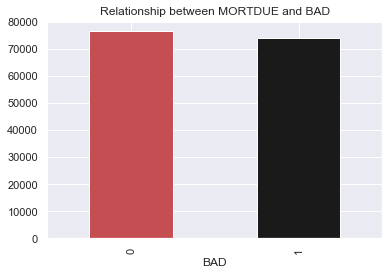

In [26]:
#relationship between MORTDUE and BAD
colors_list = ['r','k']
default_by_MORTDUE = df.groupby('BAD')['MORTDUE'].mean()
default_by_MORTDUE.plot(kind='bar', color=colors_list,edgecolor=None,title='Relationship between MORTDUE and BAD', sharey=True)
plt.show()

In [27]:
#comparing means of BAD and VALUE
df.groupby('BAD')['VALUE'].agg(['count','mean'])

,count,mean
BAD,,
0,3064,107950.247389
1,300,102917.013333


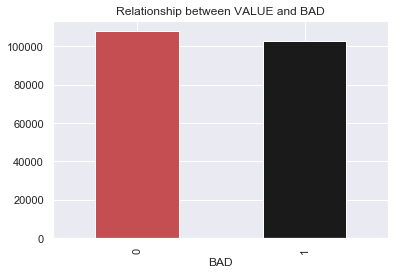

In [28]:
#relationship between VALUE and BAD
colors_list = ['r','k']
default_by_VALUE = df.groupby('BAD')['VALUE'].mean()
default_by_VALUE.plot(kind='bar', color=colors_list,edgecolor=None,title='Relationship between VALUE and BAD', sharey=True)
plt.show()

In [29]:
#comparing means of BAD and CLAGE
df.groupby('BAD')['CLAGE'].agg(['count','mean'])

,count,mean
BAD,,
0,3064,183.943307
1,300,150.868206


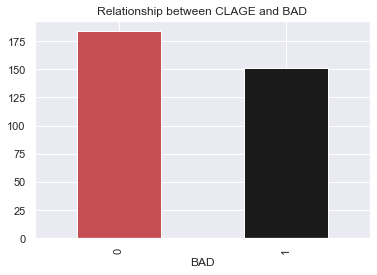

In [30]:
#relationship between CLAGE and BAD
colors_list = ['r','k']
default_by_CLAGE = df.groupby('BAD')['CLAGE'].mean()
default_by_CLAGE.plot(kind='bar', color=colors_list,edgecolor=None,title='Relationship between CLAGE and BAD', sharey=True)
plt.show()

In [31]:
#comparing means of BAD and DEBTINC
df.groupby('BAD')['DEBTINC'].agg(['count','mean'])

,count,mean
BAD,,
0,3064,33.595725
1,300,39.647852


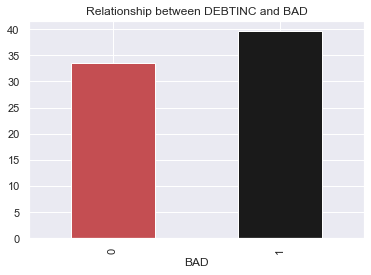

In [32]:
#relationship between DEBTINC and BAD
colors_list = ['r','k']
default_by_DEBTINC = df.groupby('BAD')['DEBTINC'].mean()
default_by_DEBTINC.plot(kind='bar', color=colors_list,edgecolor=None,title='Relationship between DEBTINC and BAD', sharey=True)
plt.show()

In [33]:
#comparing means of BAD and YOJ
df.groupby('BAD')['YOJ'].agg(['count','mean'])

,count,mean
BAD,,
0,3064,9.263055
1,300,7.550000


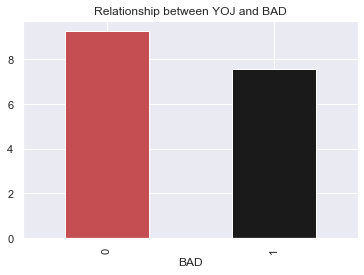

In [34]:
#relationship between YOJ and BAD
colors_list = ['r','k']
default_by_YOJ = df.groupby('BAD')['YOJ'].mean()
default_by_YOJ.plot(kind='bar', color=colors_list,edgecolor=None,title='Relationship between YOJ and BAD', sharey=True)
plt.show()

In [35]:
#comparing means of BAD and NINQ
df.groupby('BAD')['NINQ'].agg(['count','mean'])

,count,mean
BAD,,
0,3064,0.976501
1,300,1.660000


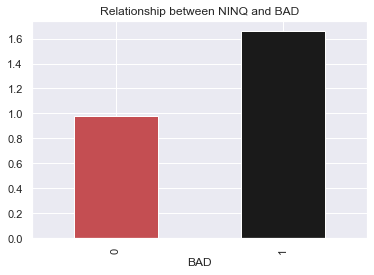

In [36]:
#relationship between NINQ and BAD
colors_list = ['r','k']
default_by_NINQ = df.groupby('BAD')['NINQ'].mean()
default_by_NINQ.plot(kind='bar', color=colors_list,edgecolor=None,title='Relationship between NINQ and BAD', sharey=True)
plt.show()

In [37]:
#comparing means of CLNO and BAD
df.groupby('BAD')['CLNO'].agg(['count','mean'])

,count,mean
BAD,,
0,3064,22.092037
1,300,22.340000


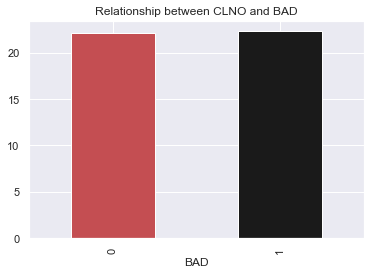

In [38]:
#relationship between CLNO and BAD
colors_list = ['r','k']
default_by_CLNO = df.groupby('BAD')['CLNO'].mean()
default_by_CLNO.plot(kind='bar', color=colors_list,edgecolor=None,title='Relationship between CLNO and BAD', sharey=True)
plt.show()

The outputs above indicate all features have a relationship with the target variable

# Data Processing
1. Encoding
2. SMOTE 
3. Standard Scaling
4. Feature selection

Encoding

In [39]:
#Encoding caterogical features
df1=pd.get_dummies(df, columns=['REASON','JOB'])
df1

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0,1,0,1,0,0,0,0
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0,1,1,0,0,0,0,0
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808717,0.0,16.0,36.112347,1,0,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1,0,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1,0,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1,0,0,0,1,0,0,0


Standard Scaler

In [40]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['MORTDUE','VALUE','CLNO','DEBTINC','YOJ']
df1[columns_to_scale] = standardScaler.fit_transform(df1[columns_to_scale])

In [41]:
df1.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,-1.013594,-1.227728,-0.014520,0.0,0.0,101.466002,1.0,-1.503755,0.374601,0,1,0,0,1,0,0,0
7,1,1800,-1.058972,-1.178130,0.248797,0.0,0.0,88.766030,0.0,-1.503755,0.345832,0,1,0,0,1,0,0,0
19,0,2300,0.579311,0.245826,-0.936129,0.0,0.0,90.992533,0.0,-0.971043,-0.320362,0,1,0,1,0,0,0,0
25,1,2400,-0.917894,-1.097044,0.380455,0.0,0.0,70.491080,1.0,-0.118704,0.519249,0,1,1,0,0,0,0,0
26,0,2400,0.492349,0.177149,-0.672812,0.0,0.0,93.811775,0.0,-0.971043,-0.560188,0,1,0,1,0,0,0,0


SMOTE

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter
y = df1['BAD'] 
smo = SMOTE(random_state=0)
X_resampled, y_resampled = smo.fit_resample(df1, y)
print(sorted(Counter(y_resampled).items()))

[(0, 3064), (1, 3064)]


Feature Selection


Lasso regression 

In [43]:
## for feature slection
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [44]:
# Capture the dependent feature
y_train=df1[['BAD']]

In [45]:
# drop dependent feature from dataset
X_train=df1.drop(['BAD'],axis=1)

In [46]:
## Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [47]:
feature_sel_model.get_support()

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False])

In [48]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 18
selected features: 7


In [49]:
selected_feat

Index(['YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'], dtype='object')

In [50]:
X_train=X_train[selected_feat]

In [51]:
X_train.head()

,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,-0.014520,0.0,0.0,101.466002,1.0,-1.503755,0.374601
7,0.248797,0.0,0.0,88.766030,0.0,-1.503755,0.345832
19,-0.936129,0.0,0.0,90.992533,0.0,-0.971043,-0.320362
25,0.380455,0.0,0.0,70.491080,1.0,-0.118704,0.519249
26,-0.672812,0.0,0.0,93.811775,0.0,-0.971043,-0.560188


# Building of Classifiers
1. Random Forest classifier
2. XgBoost classifier
3. AdaBoost classifier
4. XGB classifier

In [52]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
%matplotlib inline
from sklearn.model_selection import cross_validate


In [53]:
X = df1[['YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']]

In [54]:
# Create target variable
y = df1['BAD']

# Split Dataset

In [55]:
#training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [56]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier=RandomForestClassifier(n_estimators=10)
randomforest_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Model Evaluation(Performance metrics)
1. Model Accuracy
2. Classification Report
3. Confusion Matrix
4. AUC

In [57]:
#Predict the response for test dataset
y_pred = randomforest_classifier.predict(X_test)
y_score= randomforest_classifier.predict_proba(X_test)

Model Accuracy

In [58]:
#Accuracy of the model
print("RF train accuracy: %0.3f" % randomforest_classifier.score(X_train, y_train))
print("RF test accuracy: %0.3f" % randomforest_classifier.score(X_test, y_test))

RF train accuracy: 0.994
RF test accuracy: 0.988


Classification report

In [59]:
#import performance measure tools
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,y_pred)
rs=recall_score(y_test,y_pred, average='macro') 
ps=precision_score(y_test,y_pred, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, y_pred))

accuracy score :  0.9881129271916791
precision score :  0.9473684210526316
recall score :  0.9933884297520661
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       597
           1       1.00      0.89      0.94        76

    accuracy                           0.99       673
   macro avg       0.99      0.95      0.97       673
weighted avg       0.99      0.99      0.99       673



Confusion Matrix

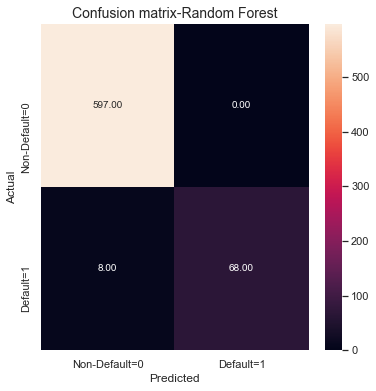

In [60]:
#displaying confusion matrix as a heat map
import seaborn as sn
#import librairies
from sklearn import metrics
import itertools
from sklearn.metrics import confusion_matrix
#creating a confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
#confusion matrix without normalisation
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Non-Default=0", "Default=1"] , yticklabels = ["Non-Default=0", "Default=1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix-Random Forest', fontsize = 14)
plt.show()

In [61]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  597
False Positives:  0
False Negatives:  8
True Positives:  68


ROC Curve (AUC)

In [62]:
#ROC plot
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for RF")
    plt.legend(loc="lower right")
    plt.show()

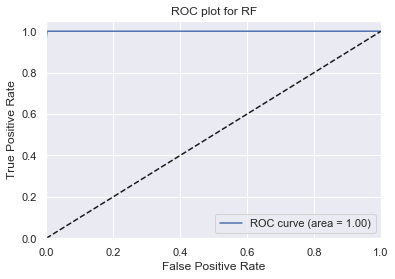

In [63]:
#Plot ROC
plot_roc(y_test, y_score)

# Feature Importance

In [64]:
#calculating feature importance
featimp = pd.Series(randomforest_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
print (featimp)

DEBTINC    0.340892
CLAGE      0.198892
CLNO       0.154797
YOJ        0.103941
DELINQ     0.095433
NINQ       0.062470
DEROG      0.043575
dtype: float64


No handles with labels found to put in legend.


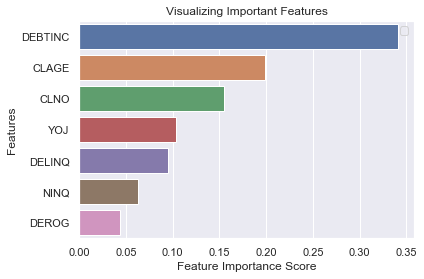

In [65]:
#load required libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=featimp, y=featimp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

KNN Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
knn_classifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [67]:
#Predict the response for test dataset
y_pred1 = knn_classifier.predict(X_test)
y_score1= knn_classifier.predict_proba(X_test)

KNN accuracy

In [68]:
#Accuracy of the model
print("KNN train accuracy: %0.3f" % knn_classifier.score(X_train, y_train))
print("KNN test accuracy: %0.3f" % knn_classifier.score(X_test, y_test))

KNN train accuracy: 0.920
KNN test accuracy: 0.887


KNN Classifier Classification Report

In [69]:
#import performance measure tools
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs1=accuracy_score(y_test,y_pred1)
rs1=recall_score(y_test,y_pred1, average='macro') 
ps1=precision_score(y_test,y_pred1, average='macro') 
print("accuracy score : ",acs1)
print("precision score : ",rs1)
print("recall score : ",ps1)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, y_pred1))


accuracy score :  0.8870728083209509
precision score :  0.5
recall score :  0.44353640416047546
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       597
           1       0.00      0.00      0.00        76

    accuracy                           0.89       673
   macro avg       0.44      0.50      0.47       673
weighted avg       0.79      0.89      0.83       673



KNN Classifier Confusion Matrix

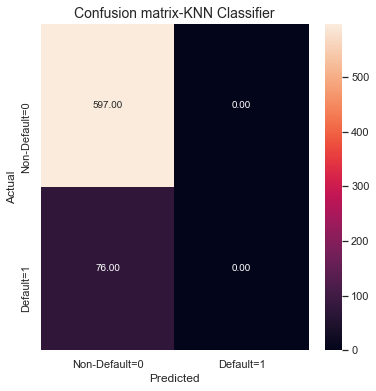

In [70]:
#displaying confusion matrix as a heat map
import seaborn as sn
#import librairies
from sklearn import metrics
#creating a confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred1)
np.set_printoptions(precision=2)
#confusion matrix without normalisation
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Non-Default=0", "Default=1"] , yticklabels = ["Non-Default=0", "Default=1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix-KNN Classifier', fontsize = 14)
plt.show()


In [71]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  597
False Positives:  0
False Negatives:  76
True Positives:  0


KNN Classifier AUC 

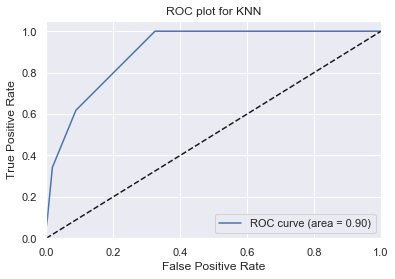

In [72]:
#ROC plot
#ROC plot
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test, y_score1):
    fpr, tpr, thresholds = roc_curve(y_test, y_score1[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for KNN")
    plt.legend(loc="lower right")
    plt.show()
plot_roc(y_test, y_score1)

Gradient Boosting Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_classifier = GradientBoostingClassifier(random_state=0)
gbm_classifier.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
#Predict the response for test dataset
y_pred2 = gbm_classifier.predict(X_test)
y_score2= gbm_classifier.predict_proba(X_test)

GBM Classifier Classification Report

In [75]:
acs2=accuracy_score(y_test,y_pred2)
rs2=recall_score(y_test,y_pred2, average='macro') 
ps2=precision_score(y_test,y_pred, average='macro') 
print("accuracy score : ",acs2)
print("precision score : ",rs2)
print("recall score : ",ps2)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, y_pred2))

accuracy score :  0.9420505200594353
precision score :  0.743421052631579
recall score :  0.9933884297520661
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       597
           1       1.00      0.49      0.65        76

    accuracy                           0.94       673
   macro avg       0.97      0.74      0.81       673
weighted avg       0.95      0.94      0.93       673



GBM Classifier Confusion Matrix

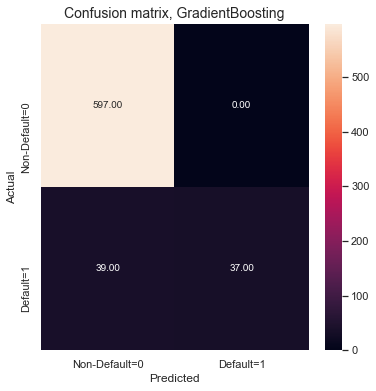

In [76]:
#displaying confusion matrix as a heat map
import seaborn as sn
#import librairies
from sklearn import metrics
#creating a confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred2)
np.set_printoptions(precision=2)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Non-Default=0", "Default=1"] , yticklabels = ["Non-Default=0", "Default=1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix, GradientBoosting', fontsize = 14)
plt.show()

In [77]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  597
False Positives:  0
False Negatives:  39
True Positives:  37


GBM Classifier AUC 

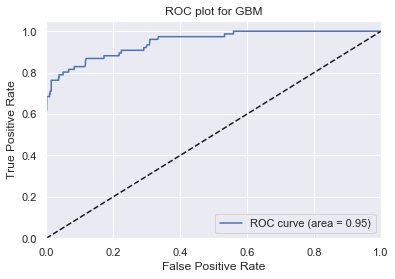

In [78]:
#Plot ROC
#ROC plot
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test, y_score2):
    fpr, tpr, thresholds = roc_curve(y_test, y_score2[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for GBM")
    plt.legend(loc="lower right")
    plt.show()
plot_roc(y_test, y_score2)

Logistic Regression Classifier 

In [79]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
#Predict the response for test dataset
y_pred3 = logistic_classifier.predict(X_test)
y_score3= logistic_classifier.predict_proba(X_test)

Logistic Regression Classification Report

In [81]:
acs3=accuracy_score(y_test,y_pred3)
rs3=recall_score(y_test,y_pred3, average='macro') 
ps3=precision_score(y_test,y_pred3, average='macro') 
print("accuracy score : ",acs3)
print("precision score : ",rs3)
print("recall score : ",ps3)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, y_pred3))

accuracy score :  0.9093610698365527
precision score :  0.6044256369567134
recall score :  0.9248565279770444
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       597
           1       0.94      0.21      0.34        76

    accuracy                           0.91       673
   macro avg       0.92      0.60      0.65       673
weighted avg       0.91      0.91      0.88       673



Logistic Regression Confusion Matrix

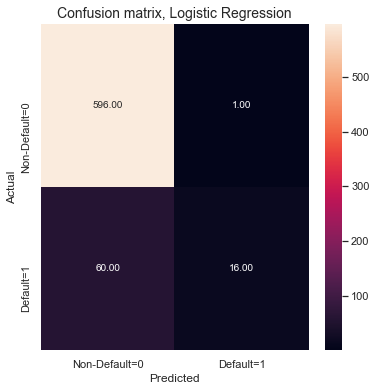

In [82]:
#displaying confusion matrix as a heat map
import seaborn as sn
#import librairies
from sklearn import metrics
#creating a confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred3)
np.set_printoptions(precision=2)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Non-Default=0", "Default=1"] , yticklabels = ["Non-Default=0", "Default=1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix, Logistic Regression', fontsize = 14)
plt.show()

In [83]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred3).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  596
False Positives:  1
False Negatives:  60
True Positives:  16


Logistic Regression AUC

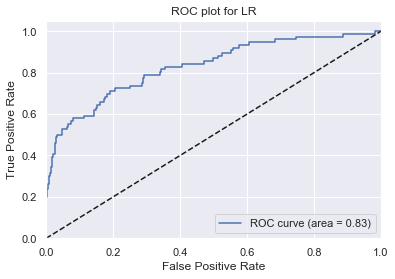

In [84]:
#Plot ROC
#ROC plot
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test, y_score3):
    fpr, tpr, thresholds = roc_curve(y_test, y_score3[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for LR")
    plt.legend(loc="lower right")
    plt.show()
plot_roc(y_test, y_score3)